# Hands-On Pertemuan 12 and 13: Data Cleaning, Preparation, and Visualization

## Objectives:
- **Pertemuan 12**: Master data cleaning and preparation techniques using Pandas.
- **Pertemuan 13**: Develop skills in data visualization using Matplotlib and Seaborn for effective data analysis.


## Pertemuan 12: Data Cleaning and Preparation using Pandas

### Topics Covered
- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)


After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


C:\Users\HP\AppData\Local\Temp\ipykernel_1944\2224635855.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1944\2224635855.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [6]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.


In [10]:
!pip install scikit-learn


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/11.0 MB ? eta -:--:--
                                              0.0/11.0 MB ? eta -:--:--
                                              0.0/11.0 MB 1.4 MB/s eta 0:00:09
                                             0.1/11.0 MB 656.4 kB/s eta 0:00:17
                                             0.1/11.0 MB 491.5 kB/s eta 0:00:23
                                             0.1/11.0 MB 722.1 kB/s eta 0:00:16
                                             0.2/11.0 MB 798.5 kB/s eta 0:00:14
                                             0.2/11.0 MB 850.1 kB/s eta 0:00:13
     -                                       0.3/11.0 MB 951.8 kB/s eta 0:00:12
     -                                       0.3/11.0 MB 985.2 kB/s eta 0:00:11
     -                                        0.4/11.0 MB 1.0 MB/s eta 0:00:11
     -                                        0.5/11.0 MB 1.0 MB/s eta 0:00:11
     --                                       0.6/11.0 MB 1

In [11]:
# Import library yang diperlukan
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1. Load dataset (menggunakan dataset Titanic)
data = sns.load_dataset("titanic")

# 2. Identifikasi missing values
print("Jumlah missing values per kolom:")
print(data.isnull().sum())

# 3. Normalisasi kolom numerik
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nData setelah normalisasi (contoh 5 baris pertama):")
print(data.head())

# 4. Standarisasi kolom kategorikal
categorical_columns = data.select_dtypes(include=["object", "category"]).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("\nData setelah encoding kategorikal:")
print(data.head())

# 5. Menghapus duplikasi
duplicates_count = data.duplicated().sum()
data = data.drop_duplicates()

print(f"\nJumlah duplikat yang dihapus: {duplicates_count}")
print(f"Dataset akhir (dimensi): {data.shape}")


Jumlah missing values per kolom:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data setelah normalisasi (contoh 5 baris pertama):
   survived  pclass     sex       age  sibsp  parch      fare embarked  class  \
0       0.0     1.0    male  0.271174  0.125    0.0  0.014151        S  Third   
1       1.0     0.0  female  0.472229  0.125    0.0  0.139136        C  First   
2       1.0     1.0  female  0.321438  0.000    0.0  0.015469        S  Third   
3       1.0     0.0  female  0.434531  0.125    0.0  0.103644        S  First   
4       0.0     1.0    male  0.434531  0.000    0.0  0.015713        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False  

## Pertemuan 13: Data Visualization using Matplotlib and Seaborn

### Topics Covered
- Plotting data distributions and comparisons.
- Creating time series visualizations.
- Visualizing relationships between variables.
- Customizing plot styles and layouts.


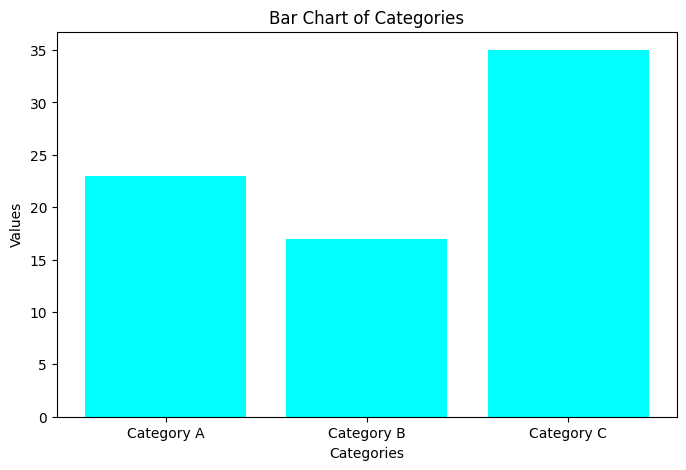

In [16]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


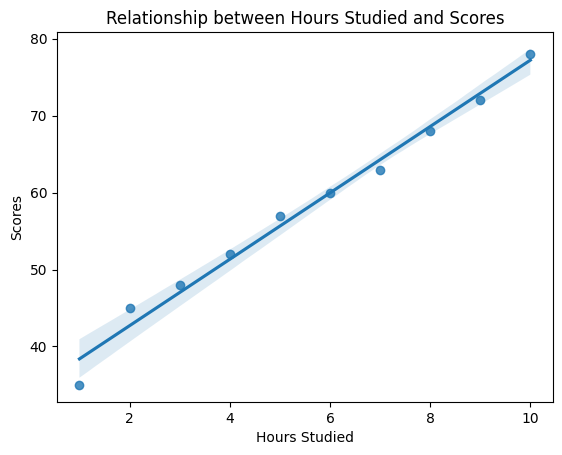

In [17]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.


## Matplotlib

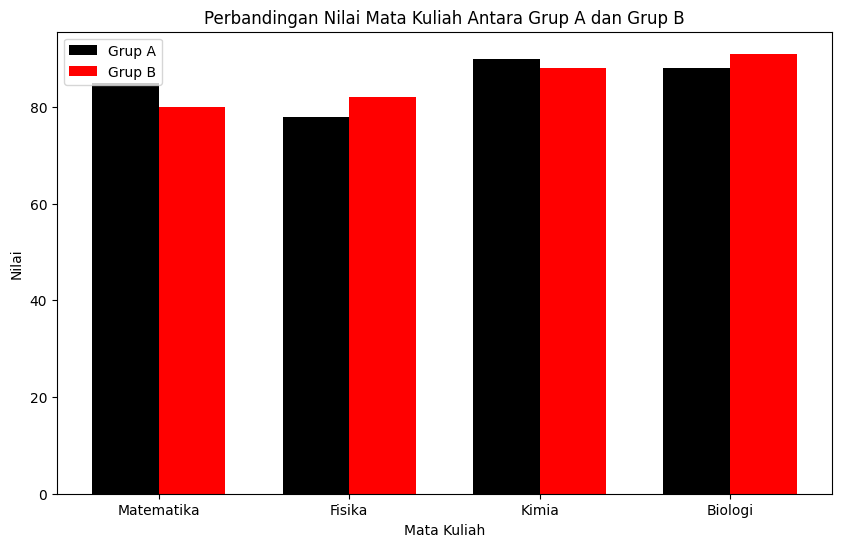

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk plotting
mata_kuliah = ['Matematika', 'Fisika', 'Kimia', 'Biologi']
nilai_grup_a = [85, 78, 90, 88]
nilai_grup_b = [80, 82, 88, 91]

# Posisi bar
x = np.arange(len(mata_kuliah))  # Posisi kategori
width = 0.35  # Lebar setiap bar

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, nilai_grup_a, width, label='Grup A', color='black')
plt.bar(x + width/2, nilai_grup_b, width, label='Grup B', color='red')

# Label dan judul
plt.xlabel('Mata Kuliah')
plt.ylabel('Nilai')
plt.title('Perbandingan Nilai Mata Kuliah Antara Grup A dan Grup B')
plt.xticks(x, mata_kuliah)
plt.legend()

plt.show()


## Seaborn

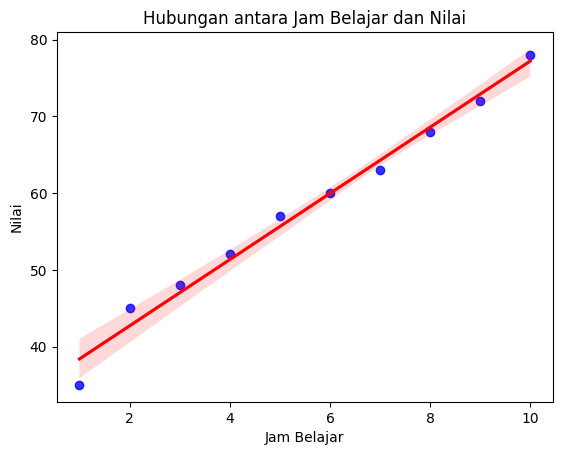

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data dalam Bahasa Indonesia
data = {
    'Jam Belajar': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nilai': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat scatter plot
sns.regplot(x='Jam Belajar', y='Nilai', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Judul plot
plt.title('Hubungan antara Jam Belajar dan Nilai')

# Menampilkan plot
plt.show()


## Homework for Students
- **Pertemuan 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.
- **Pertemuan 13**: Create a dashboard with multiple visualizations to summarize a dataset of your choice.


## Homework Pertemuan 12

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# 1. Tentukan path ke file dataset yang baru
file_path = r"C:\Users\HP\Documents\Big Data\tested.csv"  # Ganti dengan path lengkap file Anda
data = pd.read_csv(file_path)

# 2. Menampilkan informasi awal tentang dataset
print("Informasi Dataset:")
print(data.info())
print("\nStatistik Deskriptif:")
print(data.describe())

# 3. Identifikasi missing values
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

# 4. Imputasi missing values
# Imputasi kolom numerik (median)
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Imputasi kolom kategorikal (mode)
categorical_columns = data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    if col != 'Survived':  # 'Survived' adalah target, tidak perlu di-impute
        data[col].fillna(data[col].mode()[0], inplace=True)

# 5. Normalisasi kolom numerik
# Kolom numerik untuk normalisasi, kecuali kolom 'Survived' dan 'PassengerId'
columns_to_normalize = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# 6. Penanganan outlier menggunakan IQR (Interquartile Range)
for col in columns_to_normalize:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# 7. Encoding kolom kategorikal
# Encoding kolom 'Sex' dan 'Embarked' menggunakan LabelEncoder atau pd.get_dummies
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot encoding untuk Embarked

# 8. Menghapus duplikasi
duplicates_count = data.duplicated().sum()
data = data.drop_duplicates()

print(f"\nJumlah duplikasi yang dihapus: {duplicates_count}")
print("\nDataset akhir (dimensi):", data.shape)

# 9. Menyimpan dataset yang sudah dipersiapkan untuk analisis
cleaned_file_path = r"C:\Users\HP\Documents\Big Data\tested_cleaned.csv"  # Simpan hasilnya di folder yang sama
data.to_csv(cleaned_file_path, index=False)
print(f"Dataset hasil cleaning disimpan di: {cleaned_file_path}")


## Homework Pertemuan 13

C:\Users\HP\AppData\Local\Temp\ipykernel_1944\2974986822.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




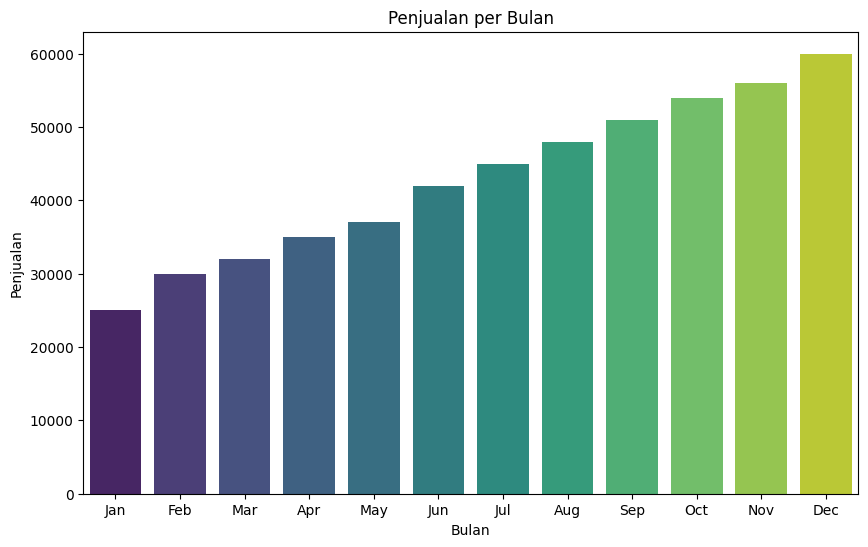

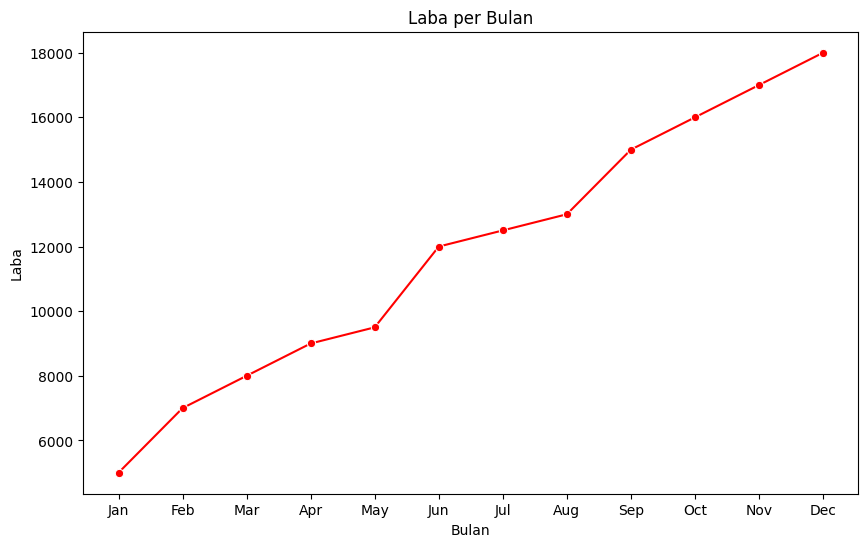

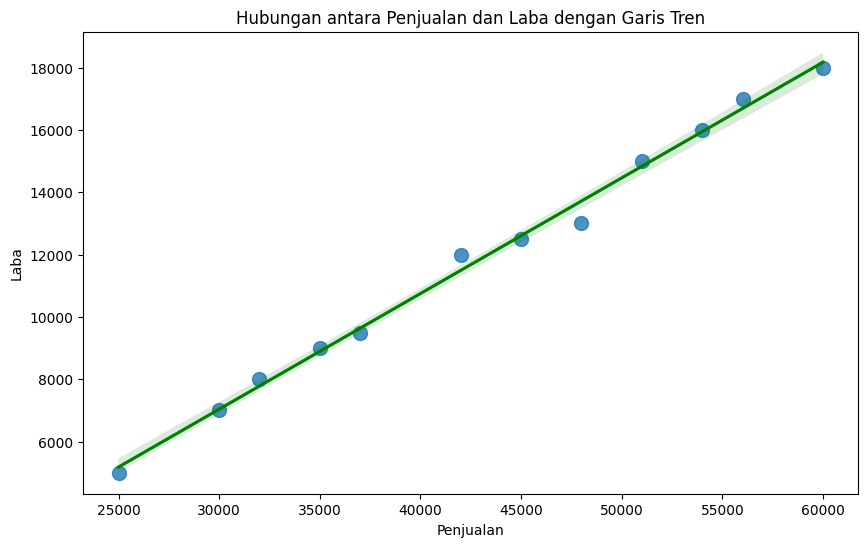

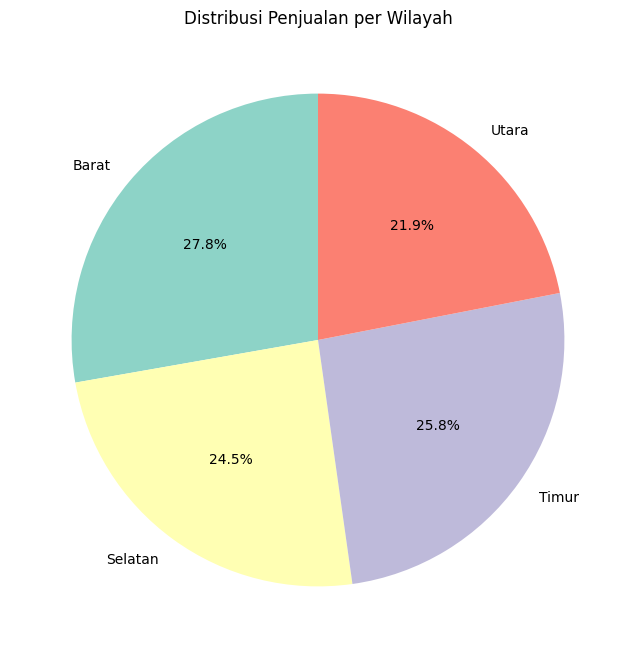

Rata-rata Penjualan: 42916.666666666664
Rata-rata Laba: 11833.333333333334
Penjualan per Wilayah:
Wilayah
Barat      143000
Selatan    126000
Timur      133000
Utara      113000
Name: Penjualan, dtype: int64


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Penjualan dan Laba
data = {
    'Bulan': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Penjualan': [25000, 30000, 32000, 35000, 37000, 42000, 45000, 48000, 51000, 54000, 56000, 60000],
    'Laba': [5000, 7000, 8000, 9000, 9500, 12000, 12500, 13000, 15000, 16000, 17000, 18000],
    'Wilayah': ['Utara', 'Selatan', 'Timur', 'Barat', 'Utara', 'Selatan', 'Timur', 'Barat', 'Utara', 'Selatan', 'Timur', 'Barat']
}

df = pd.DataFrame(data)

# Analisis Dasar
rata_penjualan = df['Penjualan'].mean()
rata_laba = df['Laba'].mean()
penjualan_per_wilayah = df.groupby('Wilayah')['Penjualan'].sum()

# Visualisasi 1: Bar Chart Penjualan per Bulan
plt.figure(figsize=(10, 6))
sns.barplot(x='Bulan', y='Penjualan', data=df, palette='viridis')
plt.title('Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Penjualan')
plt.show()

# Visualisasi 2: Line Chart Laba per Bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x='Bulan', y='Laba', data=df, marker='o', color='red')
plt.title('Laba per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Laba')
plt.show()

# Visualisasi 3: Scatter Plot Penjualan vs Laba dengan Garis Tren
plt.figure(figsize=(10, 6))
sns.regplot(x='Penjualan', y='Laba', data=df, scatter_kws={'s': 100}, line_kws={'color': 'green'})
plt.title('Hubungan antara Penjualan dan Laba dengan Garis Tren')
plt.xlabel('Penjualan')
plt.ylabel('Laba')
plt.show()

# Visualisasi 4: Pie Chart Penjualan per Wilayah
plt.figure(figsize=(8, 8))
penjualan_per_wilayah.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", n_colors=4))
plt.title('Distribusi Penjualan per Wilayah')
plt.ylabel('')  # Hapus label 'Wilayah' di bagian bawah
plt.show()

# Menampilkan Rangkuman Statistik
print(f"Rata-rata Penjualan: {rata_penjualan}")
print(f"Rata-rata Laba: {rata_laba}")
print(f"Penjualan per Wilayah:\n{penjualan_per_wilayah}")
